# METRAIL DATASET 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('Metrail+dataset.csv')
data.head()

,Month,Travellers('000)
0,Jan-91,1724.0
1,Feb-91,1638.0
2,Mar-91,1987.0
3,Apr-91,1825.0
4,May-91,NaN


In [4]:
data.columns = ['Month','Travellers']
data.head()

,Month,Travellers
0,Jan-91,1724.0
1,Feb-91,1638.0
2,Mar-91,1987.0
3,Apr-91,1825.0
4,May-91,NaN


In [5]:
#changing the data type of the month column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       159 non-null    object 
 1   Travellers  148 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [6]:
data['Month'] = pd.to_datetime(data['Month'],format="%b-%y")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       159 non-null    datetime64[ns]
 1   Travellers  148 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB


In [7]:
data.head()

,Month,Travellers
0,1991-01-01,1724.0
1,1991-02-01,1638.0
2,1991-03-01,1987.0
3,1991-04-01,1825.0
4,1991-05-01,NaN


In [8]:
data = data.set_index('Month')
data.head()

,Travellers
Month,
1991-01-01,1724.0
1991-02-01,1638.0
1991-03-01,1987.0
1991-04-01,1825.0
1991-05-01,NaN


In [9]:
#imputing with the mean
data = data.assign(Travellers_mean = data['Travellers'].fillna(data['Travellers'].mean()))
data.head()

,Travellers,Travellers_mean
Month,,
1991-01-01,1724.0,1724.000000
1991-02-01,1638.0,1638.000000
1991-03-01,1987.0,1987.000000
1991-04-01,1825.0,1825.000000
1991-05-01,NaN,1837.547297


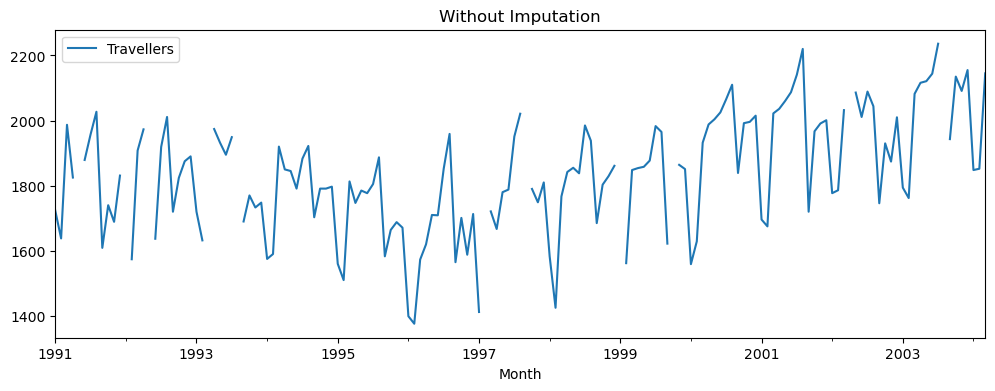

In [10]:
#plotting without imputation
data[['Travellers']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Without Imputation')
plt.show(block=False)

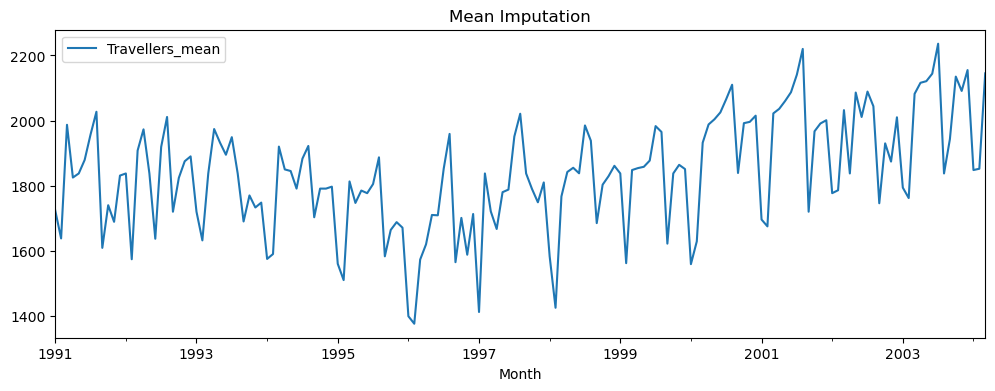

In [11]:
#plotting with imputed mean
data[['Travellers_mean']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Mean Imputation')
plt.show(block=False)

In [12]:
data['Travellers'].interpolate(method='pad',direction='forward').mean()

1838.685534591195

In [13]:
data['Travellers'].interpolate(method='backfill',direction='backward').mean()

1834.446540880503

In [14]:
data['Travellers'].interpolate(method='linear').mean()

1836.566037735849